#Import Data

In [1]:
cd /content/drive/My Drive/PROJECT/real_or_not/

/content/drive/My Drive/PROJECT/real_or_not


In [3]:
!pip install transformers

In [4]:
from utils import load_pretrained_tokenizer,load_pretrained_model
from get_data import get_data
from classifier import Classifier
from tqdm import tqdm,trange
import torch
import torch.nn as nn
from transformers import AdamW
from train import train_model
from eval import evaluate

model_name='bert'
device='cuda'
train_x,train_y,val_x,val_y=get_data(path='/content/drive/My Drive/PROJECT/real_or_not/train.csv',split=0.8)
model = Classifier(model_name).to(device)
tokenizer = load_pretrained_tokenizer(model_name)
loss= train_model(train_x,train_y,model,tokenizer,BATCH_SIZE=16,num_epochs=3)
score=evaluate(val_x,val_y,model,tokenizer,model_name=model_name)
print(score)


  0%|          | 0/407 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]


NameError: ignored

In [ ]:
from utils import evaluate_classifier
from tqdm import tqdm
import torch
import numpy as np

def evaluate(val_x,val_y,model,tokenizer,model_name='distil_bert',val_BATCH_SIZE=16):
	y_pred = []
	y_true = []
	for i in tqdm(range(0, len(val_x) , val_BATCH_SIZE)):
		q_b = val_x[i:i+val_BATCH_SIZE]
		l_b = torch.tensor(val_y[i:i+val_BATCH_SIZE]).unsqueeze(0)
		
		encoded_input = tokenizer(q_b, padding=True, max_length=100,  truncation='longest_first', return_tensors="pt")
		input_ids = encoded_input['input_ids'].to(device)
		#token_type_ids = encoded_input['token_type_ids']
		attention_mask = encoded_input['attention_mask'].to(device)

		pred = model(input_ids=input_ids, attention_mask=attention_mask)

		y_pred += np.argmax(pred.cpu().detach().numpy(), axis = 1).tolist()
		y_true += l_b.detach().numpy().squeeze().tolist()

	return evaluate_classifier(model_name, y_true, y_pred)
score=evaluate(val_x,val_y,model,tokenizer,model_name=model_name)
print(score)


100%|██████████| 70/70 [00:08<00:00,  8.59it/s]

{'Model': 'bert', 'AUC': 0.5, 'MAP': 0.4573225516621743, 'Accuracy': 0.5426774483378257, 'F1': 0.5426774483378257}


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l1
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout,Bidirectional,LSTM,GRU,Conv1D,MaxPooling1D,Flatten
import matplotlib.pyplot as plt
from keras.regularizers import l1
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout
import matplotlib.pyplot as plt


df=pd.read_csv("/content/drive/My Drive/PROJECT/NLP Warmup/train.csv")
df=df.sample(frac=1)
train_x=df['text'][:6500].to_list()
train_y=np.array(df['target'][:6500])
val_x=df['text'][6500:].to_list()
val_y=np.array(df['target'][6500:])

#LSTM model


In [ ]:


vocab_size=20000
embedding_dim=32
max_length=30
trunc_type='post'
oov_token="<OOV>"

tokenizer = Tokenizer(vocab_size,oov_token)
tokenizer.fit_on_texts(df['text'])
word_index=tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_x)
padded = pad_sequences(sequences, maxlen=max_length,truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(val_x)
test_padded = pad_sequences(test_seq, maxlen=max_length,truncating=trunc_type)

In [ ]:
# instantiate regularizer
reg = l1(0.01)
model = tf.keras.Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    Bidirectional(tf.keras.layers.LSTM(32,kernel_initializer='glorot_normal',activity_regularizer=reg,return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer='glorot_normal',activity_regularizer=reg)
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 32)            640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 30, 64)            16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 30, 1)             65        
Total params: 656,705
Trainable params: 656,705
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs=50
history=model.fit(padded,train_y,epochs=num_epochs,validation_data=(test_padded,val_y),batch_size=32)

Epoch 1/50
204/204 [==============================] - 3s 16ms/step - loss: 0.8646 - accuracy: 0.5723 - val_loss: 0.8344 - val_accuracy: 0.5615
Epoch 2/50
204/204 [==============================] - 3s 13ms/step - loss: 0.8258 - accuracy: 0.5718 - val_loss: 0.8195 - val_accuracy: 0.5615
Epoch 3/50
204/204 [==============================] - 3s 14ms/step - loss: 0.8131 - accuracy: 0.5718 - val_loss: 0.8135 - val_accuracy: 0.5615
Epoch 4/50
204/204 [==============================] - 3s 13ms/step - loss: 0.7972 - accuracy: 0.6180 - val_loss: 0.8109 - val_accuracy: 0.6837
Epoch 5/50
204/204 [==============================] - 3s 13ms/step - loss: 0.7166 - accuracy: 0.8168 - val_loss: 0.7835 - val_accuracy: 0.7593
Epoch 6/50
204/204 [==============================] - 3s 13ms/step - loss: 0.6376 - accuracy: 0.9125 - val_loss: 0.7964 - val_accuracy: 0.7510
Epoch 7/50
204/204 [==============================] - 3s 13ms/step - loss: 0.5936 - accuracy: 0.9376 - val_loss: 0.7974 - val_accuracy: 0.7544

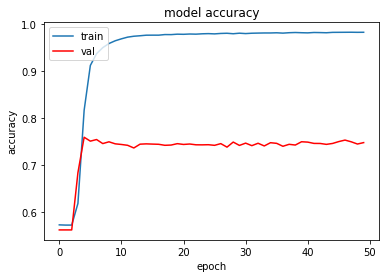

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='r')
#plt.plot(history.history['loss'],color='r')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train', 'val'], loc='upper left')

#BERT model from scratch


In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 3.5MB/s 
     |████████████████████████████████| 3.0MB 14.8MB/s 
     |████████████████████████████████| 1.1MB 27.3MB/s 
     |████████████████████████████████| 890kB 37.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=e146f7b71f07c98ddaee86c8a09b8879693d411984d36df4fc36c4989fc5e2fb
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
BATCH_SIZE = 128
val_BATCH_SIZE = 16
device = 'cuda'
model_name = 'distil_bert'

In [ ]:
import torch
import torch.nn as nn
import os
import json
import numpy as np
import pandas as po
from tqdm import tqdm
from transformers import AdamW

class Classifier(nn.Module):
	def __init__(self):
		super(Classifier, self).__init__()
		self.pretrained_model 	= load_pretrained_model('distil_bert')
		self.dropout 			= nn.Dropout(0.2)
		self.linear		= nn.Linear(768, 2)

	def forward(self, input_ids, attention_mask, token_type_ids=None):
		outputs = self.pretrained_model(input_ids=input_ids, attention_mask=attention_mask)
		pooled_output = outputs[0][:, 0, :]
		pooled_output = self.dropout(pooled_output)
		logits = self.linear(pooled_output)
		return logits

In [ ]:
import os
import torch
import pandas as po
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, f1_score

def load_pretrained_model(model, pretrained_weights_shortcut=None):
     if model == 'bert':
          from transformers import BertModel
          
          if pretrained_weights_shortcut == None:
               model = BertModel.from_pretrained('bert-base-uncased')

          else:
               model = BertModel.from_pretrained(pretrained_weights_shortcut)

          return model

     if model == 'distil_bert':
          from transformers import DistilBertModel
          
          if pretrained_weights_shortcut == None:
               model = DistilBertModel.from_pretrained('distilbert-base-uncased')

          else:
               model = DistilBertModel.from_pretrained(pretrained_weights_shortcut)

          return model

def load_pretrained_tokenizer(model, pretrained_weights_shortcut=None):
     if model == 'bert':
          from transformers import BertTokenizer
          
          if pretrained_weights_shortcut == None:
               tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

          else:
               tokenizer = BertTokenizer.from_pretrained(pretrained_weights_shortcut)

          return tokenizer

     if model == 'distil_bert':
          from transformers import DistilBertTokenizer
          
          if pretrained_weights_shortcut == None:
               tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

          else:
               tokenizer = DistilBertTokenizer.from_pretrained(pretrained_weights_shortcut)

          return tokenizer

def area_under_the_curve(y_true, y_pred):
     return roc_auc_score(y_true, y_pred)

def mean_average_precision(y_true, y_pred):
  return average_precision_score(y_true, y_pred)

def accuracy(y_true, y_pred):
  return accuracy_score(y_true, y_pred)

def f1(y_true, y_pred):
  return f1_score(y_true, y_pred, average='micro')

def evaluate_classifier(model_name, y_true, y_pred, save_path='results.csv'):
    metrics = {'Model' : model_name, 
           'AUC' : area_under_the_curve(y_true, y_pred), 
           'MAP' : mean_average_precision(y_true, y_pred), 
           'Accuracy' : accuracy(y_true, y_pred),
           'F1' : f1(y_true, y_pred)
           }
    return metrics
"""if not os.path.exists(save_path):
       results_df = po.DataFrame(columns = ['Model'])
     else:
       results_df = po.read_csv(save_path)

     results_df = results_df.append(metrics, ignore_index=True)
     results_df.to_csv(save_path, index=False)"""

"if not os.path.exists(save_path):\n       results_df = po.DataFrame(columns = ['Model'])\n     else:\n       results_df = po.read_csv(save_path)\n\n     results_df = results_df.append(metrics, ignore_index=True)\n     results_df.to_csv(save_path, index=False)"

In [ ]:
model = Classifier().to(device)
model.train()

tokenizer = load_pretrained_tokenizer('distil_bert')

optimizer = AdamW(model.parameters(), lr=1e-5)
loss_funk = nn.CrossEntropyLoss()

num_epochs=10

for epoch in range(num_epochs):
  for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
    q_b = train_x[i:i+BATCH_SIZE]
    l_b = torch.tensor(train_y[i:i+BATCH_SIZE]).to(device)
     
    encoded_input = tokenizer(q_b, padding=True, max_length=100,  truncation='longest_first', return_tensors="pt")
    input_ids = encoded_input['input_ids'].to(device)
    #token_type_ids = encoded_input['token_type_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    pred = model(input_ids=input_ids, attention_mask=attention_mask)

    loss = loss_funk(pred, l_b)
    loss.backward()
    optimizer.step()

#torch.save(model.state_dict(), 'models/{}.pt'.format(model_name))

#model.load_state_dict(torch.load('models/{}.pt'.format(model_name)))

100%|██████████| 51/51 [01:04<00:00,  1.27s/it]


In [ ]:
y_pred = []
y_true = []

for i in tqdm(range(0, len(val_x) , val_BATCH_SIZE)):
    q_b = val_x[i:i+val_BATCH_SIZE]
    l_b = torch.tensor(val_y[i:i+val_BATCH_SIZE]).unsqueeze(0)
    
    encoded_input = tokenizer(q_b, padding=True, max_length=100,  truncation='longest_first', return_tensors="pt")
    input_ids = encoded_input['input_ids'].to(device)
    #token_type_ids = encoded_input['token_type_ids']
    attention_mask = encoded_input['attention_mask'].to(device)

    pred = model(input_ids=input_ids, attention_mask=attention_mask)

    y_pred += np.argmax(pred.cpu().detach().numpy(), axis = 1).tolist()
    y_true += l_b.detach().numpy().squeeze().tolist()

evaluate_classifier('bert', y_true, y_pred)

100%|██████████| 70/70 [00:04<00:00, 15.45it/s]


{'AUC': 0.8138204606820227,
 'Accuracy': 0.825696316262354,
 'F1': 0.825696316262354,
 'MAP': 0.7122702323081329,
 'Model': 'bert'}

#BERT for sequence classification
